# 一元函数最小值
求一个一元函数的最小值：
$$ y=x+10sin(5x)+7cos(4x) $$ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
import random
from mpl_toolkits.mplot3d import Axes3D

## 1.　在[0,10]上画出曲线

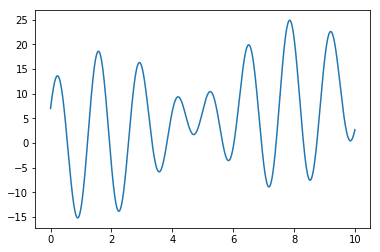

In [3]:
#曲线显示
x = np.linspace(0,10,10000)
y = x+10*np.sin(5*x)+7*np.cos(4*x)
plt.plot(x,y)

## 2. 模拟退火算法的关键函数

### 2.1 判断函数

In [4]:
#判断函数
#返回1表示接受当前解，返回0表示拒绝当前
#当系统内能减少时（目标函数值减小，新解更理想），接收该解；
#当系统内能增加时（新解比旧解更差），以一定的概率接受当前解（当T变小时，probability在减小，于是接受更差的解的概率值越小，退火过程趋于稳定）
def Judge(deltaE,T):
    if deltaE < 0:
        return 1
    else:
        probability = math.exp(-deltaE/T)
        if probability > random.random():
            return 1
        else:
            return 0

### 2.2 随机打扰函数

In [5]:
#为当前解添加随机扰动
#让x在定义域内左右摆动（随机化）
def Disturbance(low,high,x_old):
    if random.random()>0.5:
        x_new = x_old + (high - x_old) * random.random()
    else:
        x_new = x_old - (x_old - low) * random.random()
    return x_new

### 2.3 优化目标函数

In [6]:
#优化目标函数
def ObjFun(x):
    y = x + 10 * math.sin(5 * x) + 7 * math.cos(4 * x)
    return y

## 3.迭代过程

### 3.1 迭代循环过程

In [8]:
#参数设置
low = 0
high = 9
tmp = 1e5
tmp_min = 1e-3
alpha = 0.98
 
#初始化
x_old = (high-low) * random.random() + low
x_new = x_old
value_old = ObjFun(x_old)
value_new = value_old
 
counter = 0
record_x = []
record_y = []
while(tmp > tmp_min and counter <= 10000):
    x_new = Disturbance(low,high,x_old)
    value_new = ObjFun(x_new)
    deltaE = value_new - value_old
    if Judge(deltaE,tmp)==1:
        value_old=value_new
        record_x.append(x_new)
        record_y.append(value_new)
        x_old=x_new
    if deltaE < 0:
        tmp=tmp*alpha #deltaE < 0说明新解较为理想，继续沿着降温的方向寻找，减少跳出可能性；当温度减小，当前内能变化量的概率值会变小
    else:
        counter+=1


### 3.2 迭代动画

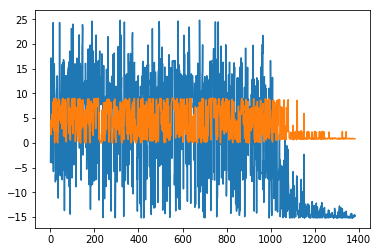

In [10]:
#观察x的变化以及目标函数值的变化
length=len(record_x)
index=[i+1 for i in range(length)]
plt.plot(index,record_y)
plt.plot(index,record_x) 

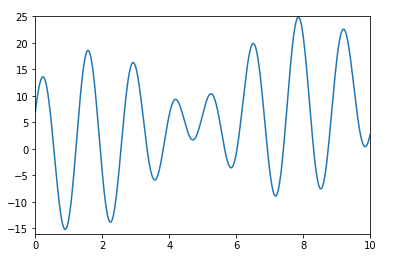

In [11]:
#动画绘制
fig, ax = plt.subplots()
l = ax.plot(x, y)
dot, = ax.plot([], [], 'ro')
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-16, 25)
    return l
def gen_dot():
    for i in index:
        newdot = [record_x[i-1], record_y[i-1]]
        yield newdot
def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,
ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot, interval = 10, init_func=init)
plt.show()
